<a href="https://colab.research.google.com/github/Reichidad/Machine-Learning-2020-Spring-Class/blob/assignment06/assignment06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression for a binary classification with a non-linear classification boundary - 20145822 김영현
---
## 1. Plot the training data
  - plot the training data points $(x, y)$ with their labels $l$ in colors (blue for label 0 and red for label 1)
  - Same as sample code of requirement

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math

# data input
data    = np.genfromtxt("/content/drive/My Drive/Colab Notebooks/data06/data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

# function definition
# calculate f_k value
def func_k_calc(x, y, x_exp, y_exp):
  return (x ** x_exp) * (y ** y_exp)
# calculate g function value
def func_calc(theta_list, x, y, dim_list):
  func_val = 0
  for i in range(len(theta_list)):
    func_val += theta_list[i] * func_k_calc(x, y, dim_list[i][0], dim_list[i][1])
  return func_val
# calculate z values
def z_calc(theta_list, pointX, pointY, dim_list):
  z = []
  for i in range(len(pointX)):
    z_iteration = func_calc(theta_list, pointX[i], pointY[i], dim_list)
    z.append(z_iteration)
  return z
# calculate sigmoid values
def calc_sigmoid(z):
  sigmoid = []
  for i in range(len(z)):
    sigmoid.append(1/(1+math.exp(-z[i])))
  return sigmoid
# calculate objective function value
def ob_func(label, sigmoid):
  sum = 0
  for i in range(len(label)):
    oprd_left = (-1*label[i]) * math.log(sigmoid[i])
    oprd_right = (1-label[i]) * math.log(1-sigmoid[i])
    sum += oprd_left - oprd_right
  return sum/len(label)
# calculate next theta value
def theta_desc(theta_list, alpha, pointX, pointY, label, sigmoid, dim_list):
  sum = [0, 0, 0, 0, 0, 0]
  for i in range(len(sigmoid)):
    for j in range(len(theta_list)):
      sum[j] += (sigmoid[i] - label[i]) * func_k_calc(pointX[i], pointY[i], dim_list[j][0], dim_list[j][1])

  for i in range(len(theta_list)):
    sum[i] = sum[i] / len(sigmoid) * alpha
    theta_list[i] = theta_list[i] - sum[i]
 
  return theta_list

# initialize g(x, y, theta) function
theta_list = [1,1,1,1,1,1]
dim_list = [[0,0],
                  [1,0],
                  [0,1],
                  [2,0],
                  [1,1],
                  [0,2]]
# variable initialization
alpha = 0.001
iteration = 0
# variable list for store iteration data
ob_func_list = []
theta_desc_list = []
accuracy_list = []
# iteration
while True:
  # calculate each value for this iteration
  z_list = z_calc(theta_list, pointX, pointY, dim_list)
  sigmoid_list = calc_sigmoid(z_list)
  ob_func_val = ob_func(label, sigmoid_list)
  # store predictions
  predictions = []
  p_count = 0
  for i in z_list:
    if i < 0:
      predictions.append(0)
    else:
      predictions.append(1)
  # calculate accuracy
  acc_hit = 0
  for i in range(len(label)):
    if label[i] == predictions[i]:
      acc_hit += 1
  accuracy_list.append(acc_hit/len(label) * 100)
  # store each value
  theta_desc_list.append(theta_list)
  ob_func_list.append(ob_func_val)
  # escape rule
  if iteration > 0:
    if abs(ob_func_list[iteration] - ob_func_list[iteration-1]) < 0.000001:
      break
  # update next theta values & iteration value
  theta_list = theta_desc(theta_list, alpha, pointX, pointY, label, sigmoid_list, dim_list)
  iteration += 1

print("Training finished with")
print("iteration : ", iteration)
print("training error : ", ob_func_list[-1])
print("theta : ", theta_desc_list[-1])

iterations = [i for i in range(iteration+1)]

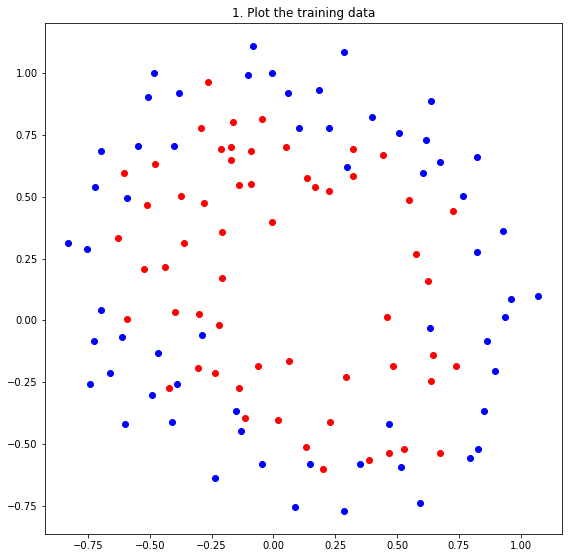

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import math
# 1. Plot the training data
plt.figure(figsize=(8,8))
plt.title("1. Plot the training data")
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## 2. Write down the high dimensional function $g(x, y, \theta)$
  - $g(x, y, \theta) = \theta_0f_0(x,y) + \theta_1f_1(x,y) + \theta_2f_2(x,y) + \theta_3f_3(x,y) + \theta_4f_4(x,y) + \theta_5f_5(x,y)$
  - $f_0(x,y) = 0$
  - $f_1(x,y) = x$
  - $f_2(x,y) = y$
  - $f_3(x,y) = x^2$
  - $f_4(x,y) = xy$
  - $f_5(x,y) = y^2$
  - The initial value of all $\theta$ was set to 1.

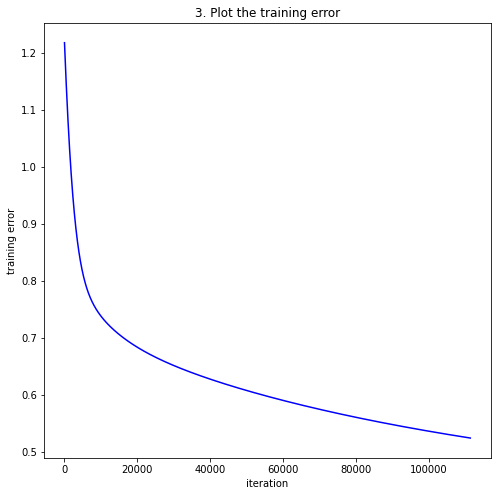

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import math
# 3. Plot the training error
plt.figure(figsize=(8,8))
plt.title("3. Plot the training error")
plt.xlabel('iteration')
plt.ylabel('training error')
plt.plot(iterations, ob_func_list, c='b', label='training error')
plt.show()

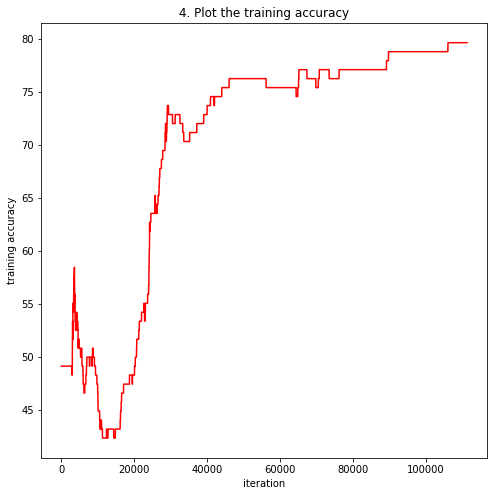

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import math
# 4. Plot the training accuracy
plt.figure(figsize=(8,8))
plt.title("4. Plot the training accuracy")
plt.xlabel('iteration')
plt.ylabel('training accuracy')
plt.plot(iterations, accuracy_list, c='r', label='training accuracy')
plt.show()